In [107]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error, mean_absolute_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pp=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
pp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
pp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#Setting this option to show maximum rows and maximum columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [7]:
# Description of the Data
pp.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,0.0,527.000000,342,907,907,888,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,NaN,NaN,280,191,304,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,KALINADI,IND0000097,NaN,NaN,NaN,Coal,Oil,Oil,NaN,NaN,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,NaN,NaN,4,519,519,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,NaN,1997.091082,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,NaN,17.082868,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


In [8]:
pp.shape

(907, 27)

In [9]:
# Finding Null values
pp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

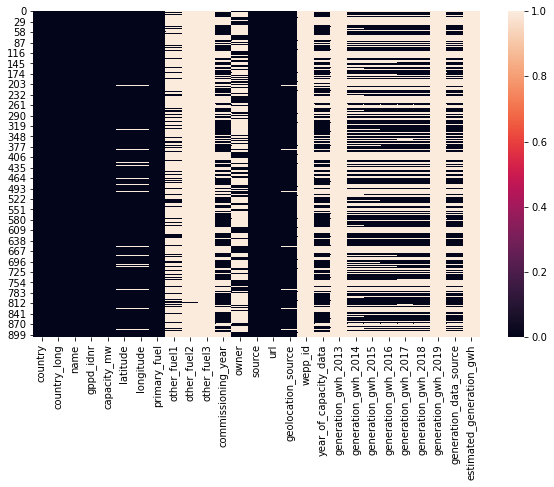

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(pp.isnull())
plt.show()

From the above output, we can see that there are 6 columns – latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, geolocation_source, year_of_capacity_datageneration_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh have missing values.

In [11]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
# Taking only relevant columns
pp_new=pp.iloc[:,:8].drop(['latitude','longitude'],axis=1)

In [13]:
pp_new['Source']=pp['source']
pp_new.head()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,Source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Ultratech Cement ltd
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,CDM
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,Central Electricity Authority


# changing categorical data  to numeric

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in pp_new.columns:
    if pp_new[i].dtype==object:
       pp_new[i]=le.fit_transform((pp_new[i].astype(str)))

In [25]:
pp_new.head()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,Source
0,0,0,0,657,2.5,6,109
1,0,0,1,519,98.0,1,174
2,0,0,2,853,39.2,7,21
3,0,0,3,0,135.0,2,22
4,0,0,4,1,1800.0,1,22


# Exploratory Data Analysis

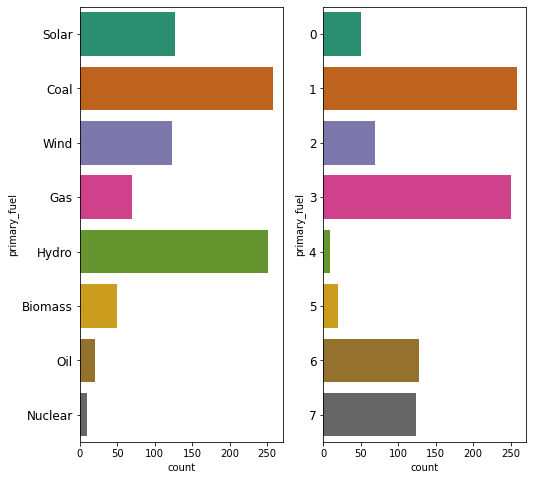

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.countplot(y='primary_fuel',palette='Dark2',data=pp)
plt.yticks(size=12)
plt.subplot(1,2,2)
sns.countplot(y='primary_fuel',palette='Dark2',data=pp_new)
plt.yticks(size=12)
plt.show()

Coal and Hydro Power are the most used primary fuels


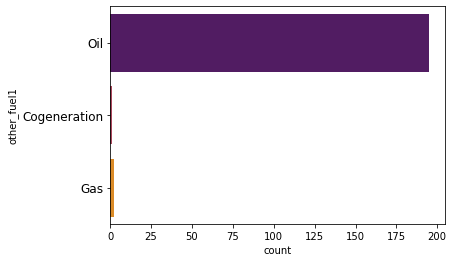

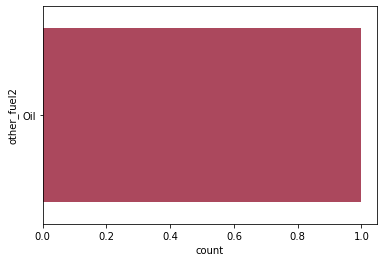

In [21]:
sns.countplot(y='other_fuel1',palette='inferno',data=pp)
plt.yticks(size=12)
plt.show()
sns.countplot(y='other_fuel2',palette='inferno',data=pp)
plt.show()

In [16]:
pp_new['Source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Jk Cement ltd                                                    4
Reliance Power Ltd                                               4
Acc Acc ltd                                                      4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Shree Sugars ltd                                                 3
Shri Ssk ltd                                                     3
Ujaas Energy Limited                                             3
Karnataka Power Corporation Limited                              3
Jaypee Ltd jccl)                                              

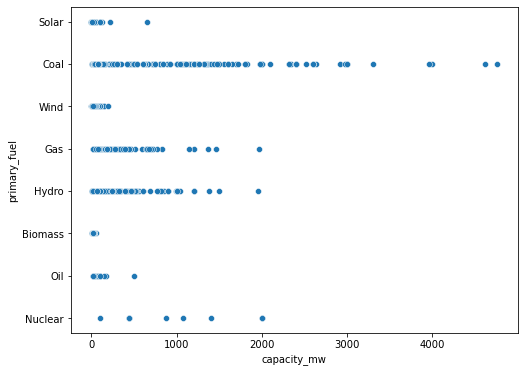

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=pp)
plt.show()

Coal has the maximum capacity. Whereas Biomass has the minimum

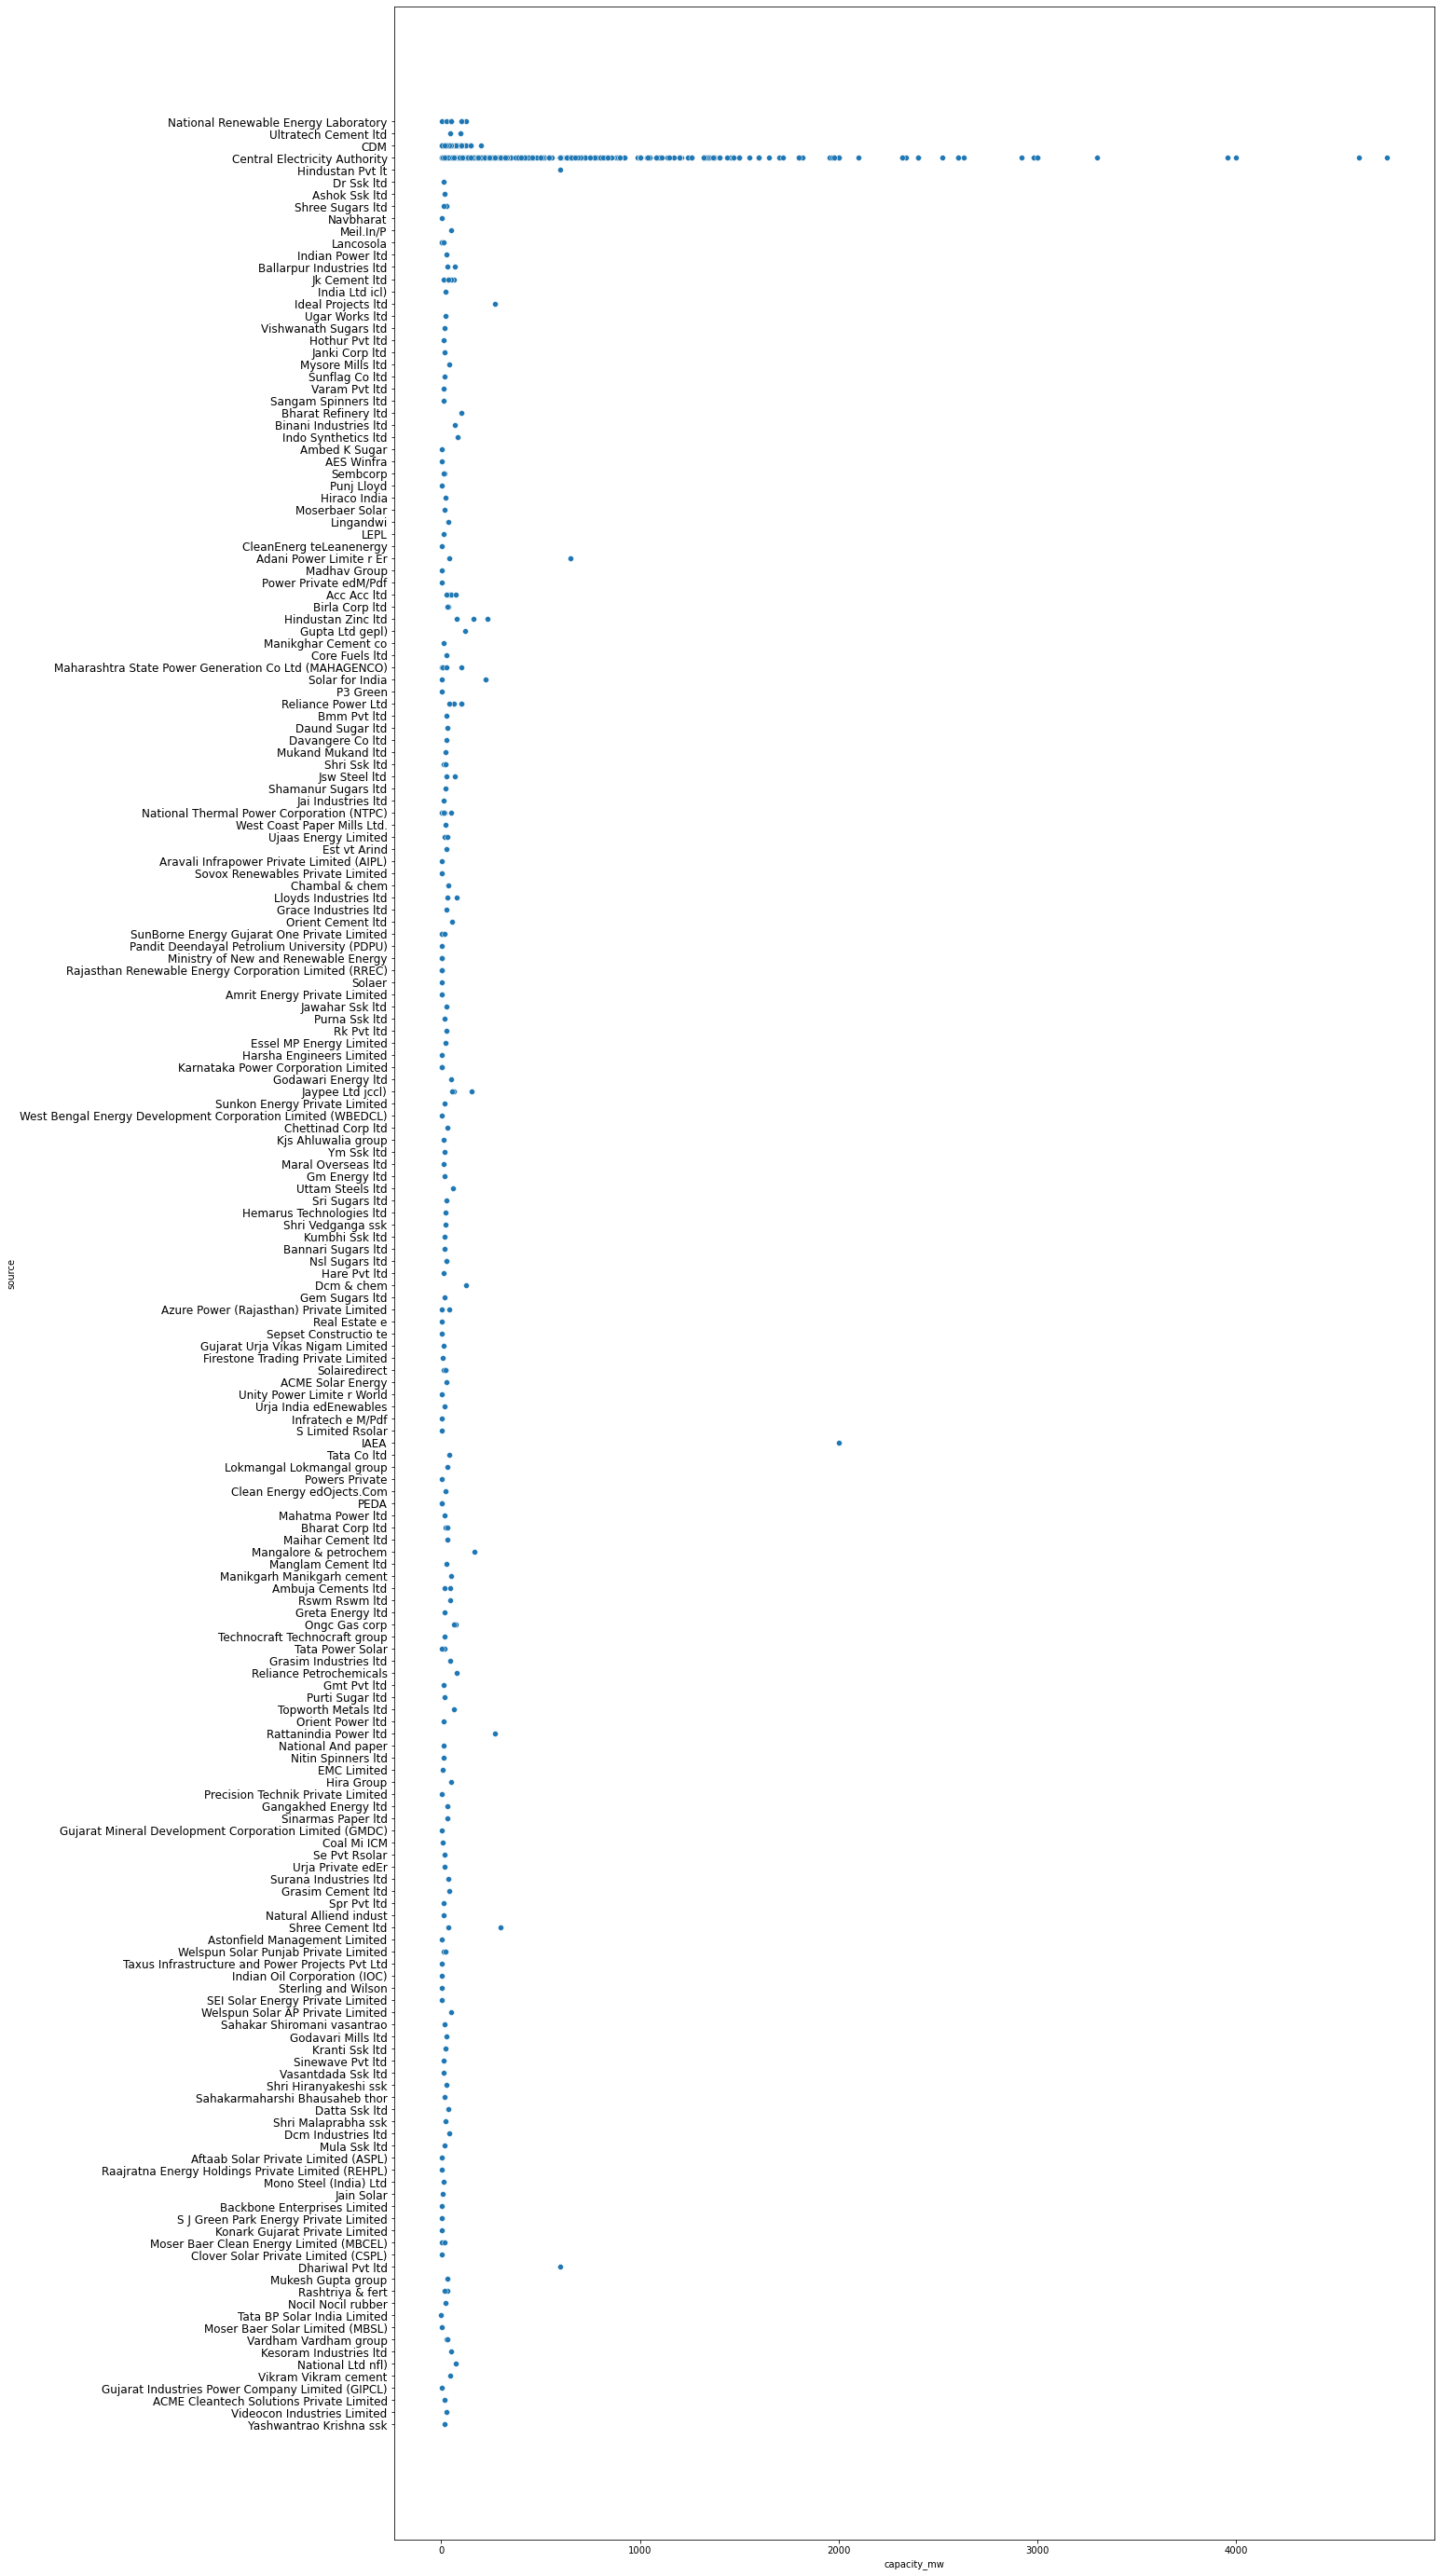

In [18]:
plt.figure(figsize=(20,50))
sns.scatterplot(x='capacity_mw',y='source',data=pp)
plt.yticks(size=12)
plt.show()

Central Electricity Autority has the highest capacity.

# Predicting Primary Fuel

**Splitting the Data into features and vectors**

In [79]:
x=pp_new.drop(['primary_fuel','country','gppd_idnr'],axis = 1 )
y=pp_new['primary_fuel']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3,random_state =51)

**LogisticRegression**

In [80]:
log = LogisticRegression()
log.fit(xtrain , ytrain)
pred_l = log.predict(xtest)
acc_l = accuracy_score(ytest , pred_l)*100
print('Accuracy Score: ',acc_l,'%\n\n')
print(confusion_matrix(ytest , pred_l),'\n\n')
print(classification_report(ytest , pred_l))

Accuracy Score:  51.64835164835166 %


[[ 0  3  0  1  0  0  7  0]
 [ 0 52  0 14  0  0  6  0]
 [ 0 11  0  8  0  0  2  0]
 [ 0 24  0 37  0  0  1 11]
 [ 0  4  0  0  0  0  0  0]
 [ 0  2  0  2  0  0  1  0]
 [ 0  4  0  1  0  0 37  6]
 [ 0  9  0 13  0  0  2 15]] 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.48      0.72      0.57        72
           2       0.00      0.00      0.00        21
           3       0.49      0.51      0.50        73
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.66      0.77      0.71        48
           7       0.47      0.38      0.42        39

    accuracy                           0.52       273
   macro avg       0.26      0.30      0.28       273
weighted avg       0.44      0.52      0.47       273



**RandomForestClassifier**

In [81]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(xtrain, ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  73.26007326007326 %


[[ 5  1  0  0  0  0  5  0]
 [ 1 62  1  7  0  0  1  0]
 [ 1  6  5  9  0  0  0  0]
 [ 0 11  5 54  0  3  0  0]
 [ 0  1  0  3  0  0  0  0]
 [ 1  1  1  1  0  1  0  0]
 [ 6  8  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 39]] 


              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.69      0.86      0.77        72
           2       0.42      0.24      0.30        21
           3       0.73      0.74      0.73        73
           4       0.00      0.00      0.00         4
           5       0.25      0.20      0.22         5
           6       0.85      0.71      0.77        48
           7       1.00      1.00      1.00        39

    accuracy                           0.73       273
   macro avg       0.54      0.53      0.52       273
weighted avg       0.72      0.73      0.72       273



**KNeighborsClassifier**

In [82]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain, ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  51.64835164835166 %


[[ 3  1  0  4  0  0  3  0]
 [ 1 53  2 11  0  0  4  1]
 [ 0 10  0  9  0  0  2  0]
 [ 3 15  1 44  0  1  0  9]
 [ 0  1  0  3  0  0  0  0]
 [ 0  3  0  1  0  0  1  0]
 [ 6  6  0  6  0  0 26  4]
 [ 0  0  0 24  0  0  0 15]] 


              precision    recall  f1-score   support

           0       0.23      0.27      0.25        11
           1       0.60      0.74      0.66        72
           2       0.00      0.00      0.00        21
           3       0.43      0.60      0.50        73
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.72      0.54      0.62        48
           7       0.52      0.38      0.44        39

    accuracy                           0.52       273
   macro avg       0.31      0.32      0.31       273
weighted avg       0.48      0.52      0.49       273



**MultinomialNB**

In [83]:
multinomial = MultinomialNB()
multinomial.fit(xtrain, ytrain)
pred_mn =multinomial.predict(xtest)
acc_mn = accuracy_score(ytest , pred_mn)*100
print('Accuracy Score: ',acc_mn,'%\n\n')
print(confusion_matrix(ytest , pred_mn),'\n\n')
print(classification_report(ytest , pred_mn))

Accuracy Score:  27.472527472527474 %


[[ 2  0  0  0  0  3  5  1]
 [ 2 15 12 10 26  0  5  2]
 [ 0  3  4  6  3  1  3  1]
 [ 0  0  6 18  8 16  1 24]
 [ 0  1  3  0  0  0  0  0]
 [ 0  0  1  0  0  2  2  0]
 [26  0  0  1  0  4  9  8]
 [ 0  1  2  5  0  5  1 25]] 


              precision    recall  f1-score   support

           0       0.07      0.18      0.10        11
           1       0.75      0.21      0.33        72
           2       0.14      0.19      0.16        21
           3       0.45      0.25      0.32        73
           4       0.00      0.00      0.00         4
           5       0.06      0.40      0.11         5
           6       0.35      0.19      0.24        48
           7       0.41      0.64      0.50        39

    accuracy                           0.27       273
   macro avg       0.28      0.26      0.22       273
weighted avg       0.45      0.27      0.30       273



**DecisionTreeClassifier**

In [84]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(xtrain, ytrain)
pred_dt =decisiontree.predict(xtest)
acc_dt = accuracy_score(ytest , pred_dt)*100
print('Accuracy Score: ',acc_dt,'%\n\n')
print(confusion_matrix(ytest , pred_dt),'\n\n')
print(classification_report(ytest , pred_dt))

Accuracy Score:  67.03296703296702 %


[[ 7  1  0  0  0  0  3  0]
 [ 1 49  7  8  4  1  2  0]
 [ 1  7  6  6  0  1  0  0]
 [ 0 11  7 48  1  6  0  0]
 [ 0  1  2  1  0  0  0  0]
 [ 1  2  0  1  0  1  0  0]
 [ 4 10  0  0  0  1 33  0]
 [ 0  0  0  0  0  0  0 39]] 


              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.60      0.68      0.64        72
           2       0.27      0.29      0.28        21
           3       0.75      0.66      0.70        73
           4       0.00      0.00      0.00         4
           5       0.10      0.20      0.13         5
           6       0.87      0.69      0.77        48
           7       1.00      1.00      1.00        39

    accuracy                           0.67       273
   macro avg       0.51      0.52      0.51       273
weighted avg       0.70      0.67      0.68       273



# Cross validation score

In [85]:
from sklearn.model_selection import cross_val_score
#Cross Validation score for Random_forest
for j in range(2,10):
    lsscore=cross_val_score(random_forest,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_r,'\n\n')

At cv:- 2
cross validation score is:- 63.071447326195404
accuracy_score is:- 73.26007326007326 


At cv:- 3
cross validation score is:- 59.99424445755833
accuracy_score is:- 73.26007326007326 


At cv:- 4
cross validation score is:- 65.71186308525984
accuracy_score is:- 73.26007326007326 


At cv:- 5
cross validation score is:- 67.92301621030903
accuracy_score is:- 73.26007326007326 


At cv:- 6
cross validation score is:- 65.6064830951551
accuracy_score is:- 73.26007326007326 


At cv:- 7
cross validation score is:- 64.39390067297043
accuracy_score is:- 73.26007326007326 


At cv:- 8
cross validation score is:- 65.83702064896755
accuracy_score is:- 73.26007326007326 


At cv:- 9
cross validation score is:- 68.9064906490649
accuracy_score is:- 73.26007326007326 




In [87]:
#Cross Validation score for decisiontree
for j in range(2,10):
    lsscore=cross_val_score(decisiontree,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_dt,'\n\n')

At cv:- 2
cross validation score is:- 59.20855578570665
accuracy_score is:- 67.03296703296702 


At cv:- 3
cross validation score is:- 58.44826204474752
accuracy_score is:- 67.03296703296702 


At cv:- 4
cross validation score is:- 55.78242563642743
accuracy_score is:- 67.03296703296702 


At cv:- 5
cross validation score is:- 64.16489587760307
accuracy_score is:- 67.03296703296702 


At cv:- 6
cross validation score is:- 60.41739281979783
accuracy_score is:- 67.03296703296702 


At cv:- 7
cross validation score is:- 59.75551580202744
accuracy_score is:- 67.03296703296702 


At cv:- 8
cross validation score is:- 61.20555814314548
accuracy_score is:- 67.03296703296702 


At cv:- 9
cross validation score is:- 64.28492849284929
accuracy_score is:- 67.03296703296702 




In [89]:
lsscore_selected =cross_val_score(random_forest,x,y,cv=9).mean()
print('The cv Score is:-',lsscore_selected*100,'\nThe accuracy score is:-',acc_r)

The cv Score is:- 69.01760176017602 
The accuracy score is:- 73.26007326007326


# Conclusion

In [97]:
a=np.array(ytest)
predicted=np.array(random_forest.predict(xtest))
df_com=pd.DataFrame({'original':a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,3,3
1,6,6
2,1,1
3,3,3
4,1,1
5,2,3
6,1,1
7,3,3
8,6,6
9,1,1


# Saving the model

In [122]:
import pickle
filename='Global_Power.pkl'
pickle.dump(random_forest,open(filename,'wb'))

# Predicting capacity_mw

**Splitting the Data into features and vectors**

In [117]:
x=pp_new.drop(['capacity_mw','country','gppd_idnr'],axis = 1 )
y=pp_new['capacity_mw']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3,random_state =45)

In [118]:
lin = LinearRegression()
lin.fit(xtrain , ytrain)
pred_li = lin.predict(xtest)

In [119]:
print('error:',mean_absolute_error(ytest,lin.predict(xtest)))
mean_absolute_error(ytest,lin.predict(xtest))
mean_squared_error(ytest,lin.predict(xtest))

error: 329.9302763895336


192389.2343415166

In [121]:
lin.score(xtrain,ytrain)

0.2055779240026313